In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import scipy.integrate as integrate

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 12})

In [2]:
def import_data(filename):
    df = pd.read_csv(filename, sep='\t')
    columns = list(df.columns)
    
    newcolumns = []

    for c in columns:
        cnew = c.replace('(', '').replace(')', '')
        newcolumns.append(cnew)
    
    cdict = {a:b for (a,b) in list(zip(columns, newcolumns))}
    
    df = df.rename(columns = cdict)
    
    return df

In [3]:
def getVs(df):
    
    numNodes = 5 #Not including grounded node here (yet)

    myStrings = []
    for i in range (numNodes):
        myStrings.append('Vn'+str(i+1))
    dfVoltages = df[myStrings]

    dfVoltages.loc[:, 'Vn'+str(numNodes+1)] = list(np.zeros(len(df['time']))) #To add grounded node

    Vs = dfVoltages.to_numpy()
    Vs = np.swapaxes(Vs, 0, 1)
    
    return Vs

# Characteristic IV Curves for Simulation

In [4]:
x = sp.symbols('x')

gamma = sp.symbols('γ')
epsilon = sp.symbols('ϵ')
x0 = sp.symbols('x_0')

f = gamma * x*(x0**4 + epsilon*x**4)/(x0**4 + x**4)
f

x*γ*(x**4*ϵ + x_0**4)/(x**4 + x_0**4)

0.14 	 2.0
0.13 	 1.9499999999999997
0.12000000000000001 	 1.9000000000000001
0.11000000000000001 	 1.8500000000000003
0.1 	 1.7999999999999998


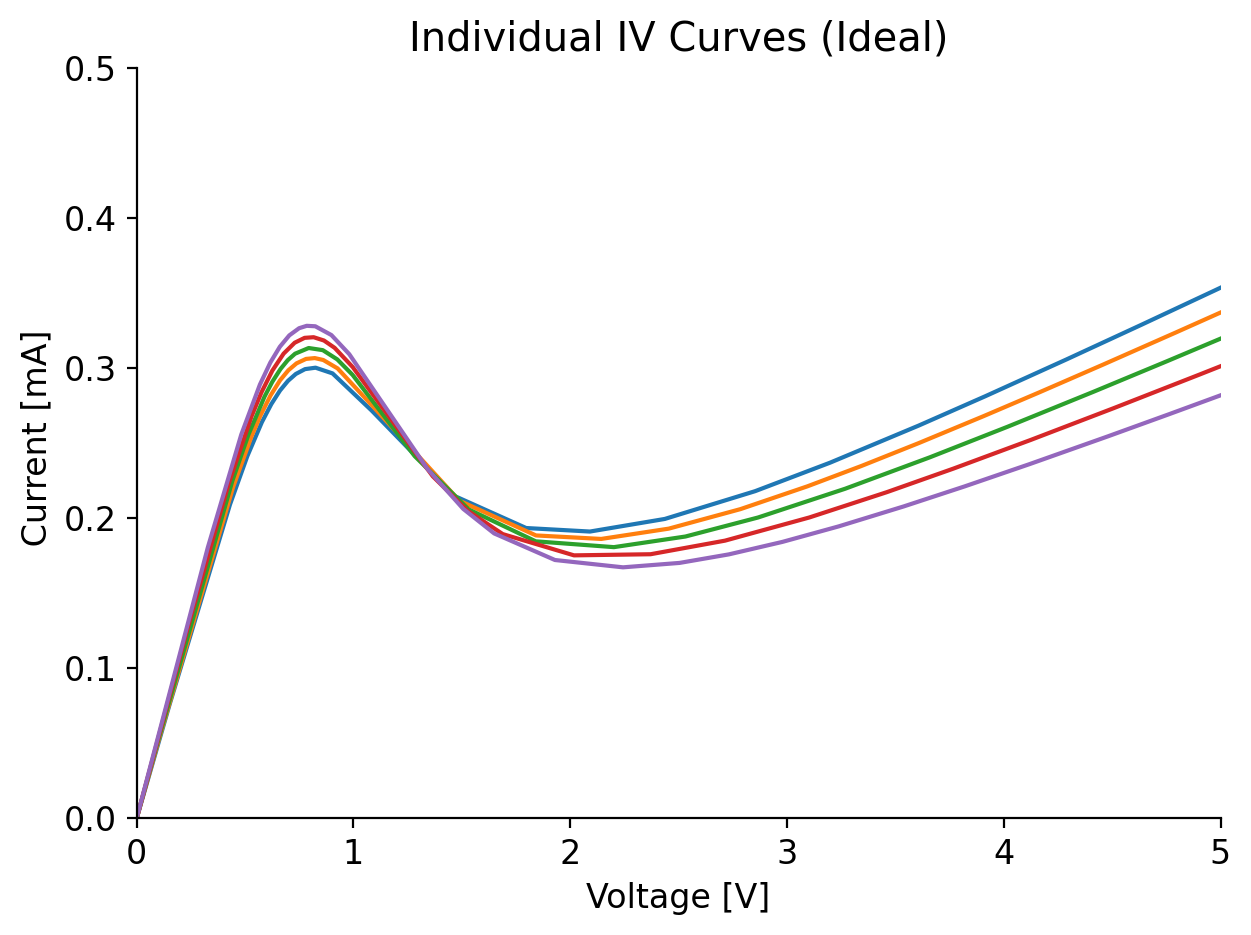

In [5]:
fs = []
ps = []

for i in range(5):
    ep = 2*(0.07-0.02*i/4)
    gam = 1/(2*(1-0.1*i/4))
    fs.append(f.subs({epsilon: ep, gamma: gam, x0: 1}))
    ps.append(sp.plot(fs[i], xlim = [0, 5], ylim = [0, 0.5], show = False, xlabel='Voltage [V]', ylabel=' Current [mA]', title='Individual IV Curves (Ideal)', label = 'f+str(i+1)'))
    print(ep, '\t', 1/gam)


p_all = ps[0]
for i in range(4):
    p_all.append(ps[i+1][0])

p_all.show()

# Voltage/Charge Relationship

In [6]:
df1 = import_data('spice_raw_data/cap_fig_c0.000001_1VperSec.txt')
capVal1 = 0.000001

In [7]:
df2 = import_data('spice_raw_data/cap_fig_c0.00001_1VperSec.txt')
capVal2 = 0.00001

df3 = import_data('spice_raw_data/cap_fig_c0.00002_1VperSec.txt')
capVal3 = 0.00002

In [8]:
Vs1 = getVs(df1)

C:\Users\nadia\AppData\Local\Temp\ipykernel_19468\2469171849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVoltages.loc[:, 'Vn'+str(numNodes+1)] = list(np.zeros(len(df['time']))) #To add grounded node


In [9]:
Vs2 = getVs(df2)
Vs3 = getVs(df3)

C:\Users\nadia\AppData\Local\Temp\ipykernel_19468\2469171849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVoltages.loc[:, 'Vn'+str(numNodes+1)] = list(np.zeros(len(df['time']))) #To add grounded node
C:\Users\nadia\AppData\Local\Temp\ipykernel_19468\2469171849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVoltages.loc[:, 'Vn'+str(numNodes+1)] = list(np.zeros(len(df['time']))) #To add grounded node


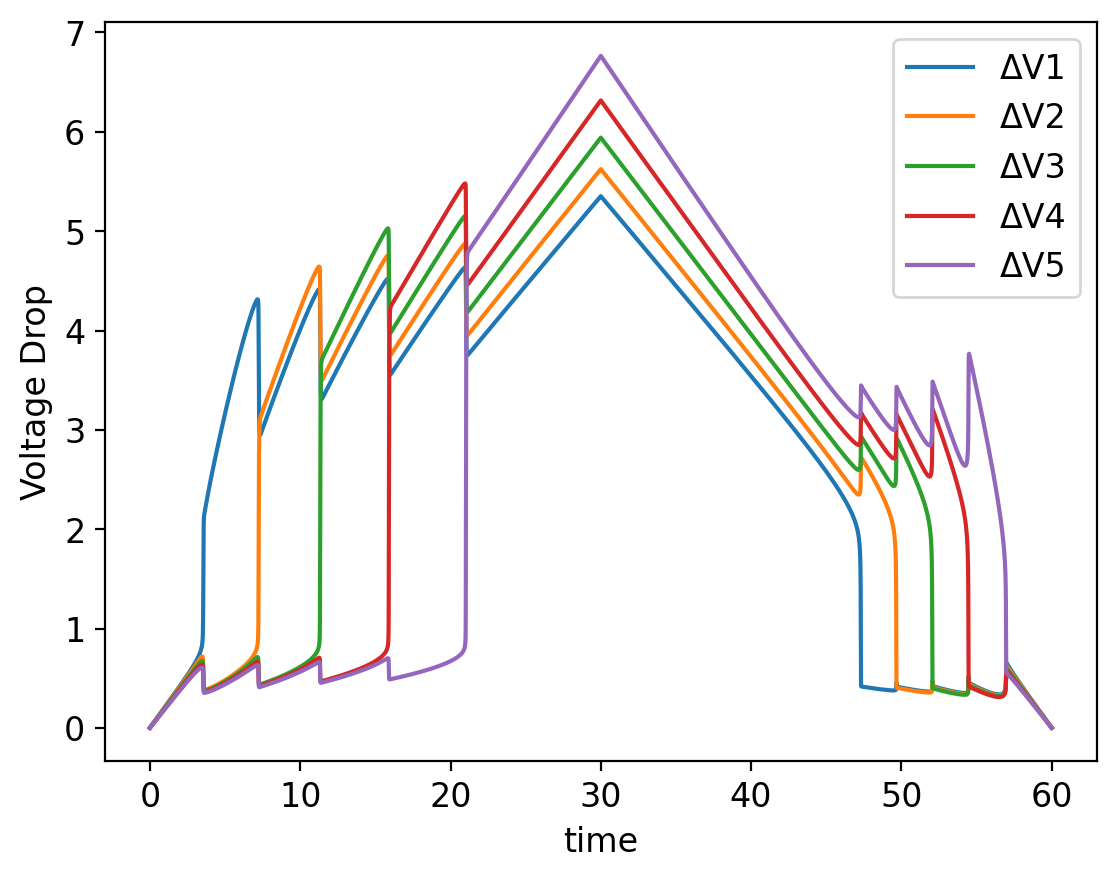

In [10]:
for i in range(len(Vs1)-1):
    plt.plot(df1['time'], Vs1[i]-Vs1[i+1], label = 'ΔV'+str(i+1))
plt.xlabel('time')
plt.ylabel('Voltage Drop')
plt.legend()
plt.show()

In [11]:
Vs1 = np.swapaxes(Vs1, 0, 1)
Vs2 = np.swapaxes(Vs2, 0, 1)

Lhat = np.zeros((len(Vs1[0]), len(Vs1[0])))
for i in range(1, len(Vs1[0])):
    Lhat[i,i]=2
    Lhat[i-1, i] =-1
    Lhat[i, i-1] =-1
Lhat[0,0]=1
Lhat[-1, -1]=1
Lhat1 = capVal1*Lhat
Lhat2 = capVal2*Lhat
print(Lhat1)

[[ 1.e-06 -1.e-06  0.e+00  0.e+00  0.e+00  0.e+00]
 [-1.e-06  2.e-06 -1.e-06  0.e+00  0.e+00  0.e+00]
 [ 0.e+00 -1.e-06  2.e-06 -1.e-06  0.e+00  0.e+00]
 [ 0.e+00  0.e+00 -1.e-06  2.e-06 -1.e-06  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 -1.e-06  2.e-06 -1.e-06]
 [ 0.e+00  0.e+00  0.e+00  0.e+00 -1.e-06  1.e-06]]


In [12]:
qs1 = np.array([list(np.dot(Lhat1, a)) for a in Vs1])
qs2 = np.array([list(np.dot(Lhat2, a)) for a in Vs2])

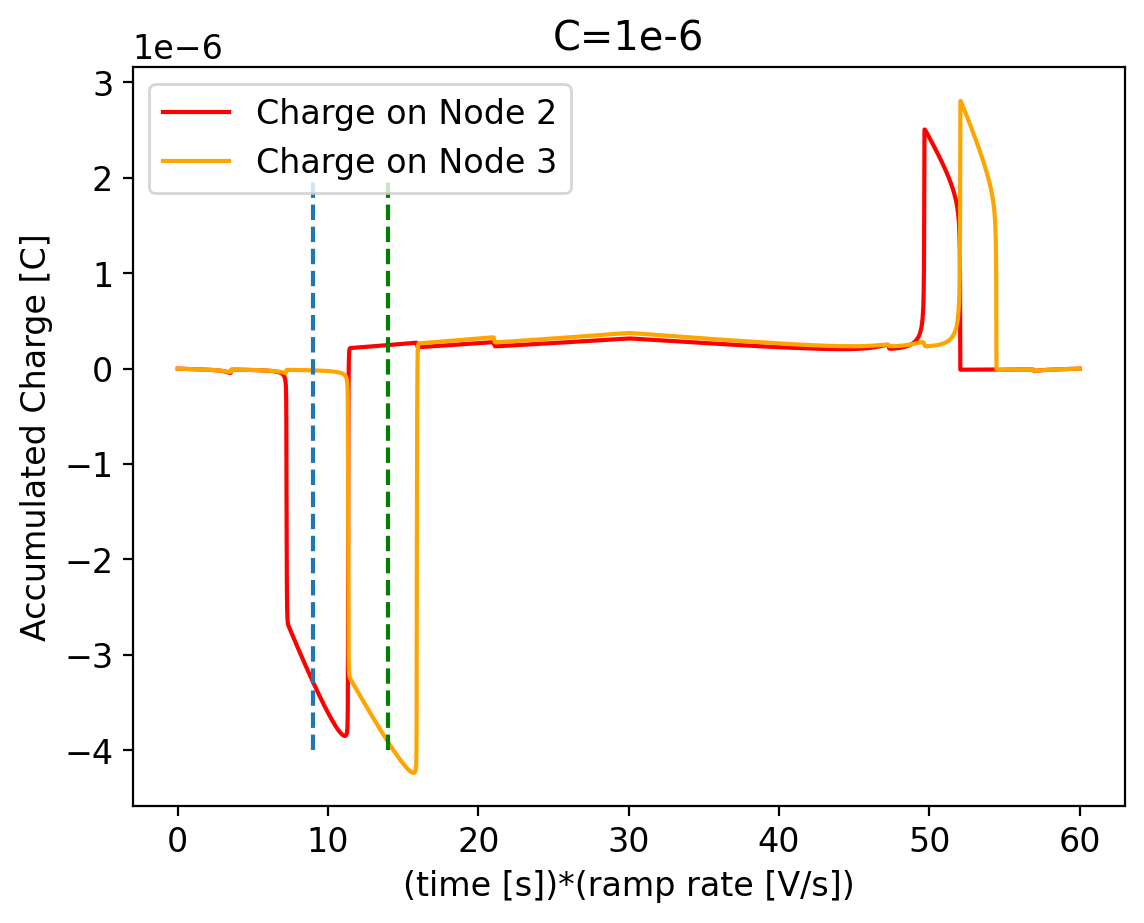

In [13]:
plt.plot(df1['time'], qs1[:,2], label = 'Charge on Node 2', color='red')
plt.plot(df1['time'], qs1[:,3], label = 'Charge on Node 3', color='orange')

plt.vlines(x=9, ymin=-4e-6, ymax= 2e-6, linestyles= '--')
plt.vlines(x=14, ymin=-4e-6, ymax= 2e-6, color= 'green', linestyles= '--')

plt.xlabel('(time [s])*(ramp rate [V/s])')
plt.ylabel('Accumulated Charge [C]')
plt.title('C=1e-6')
plt.legend()
plt.show()

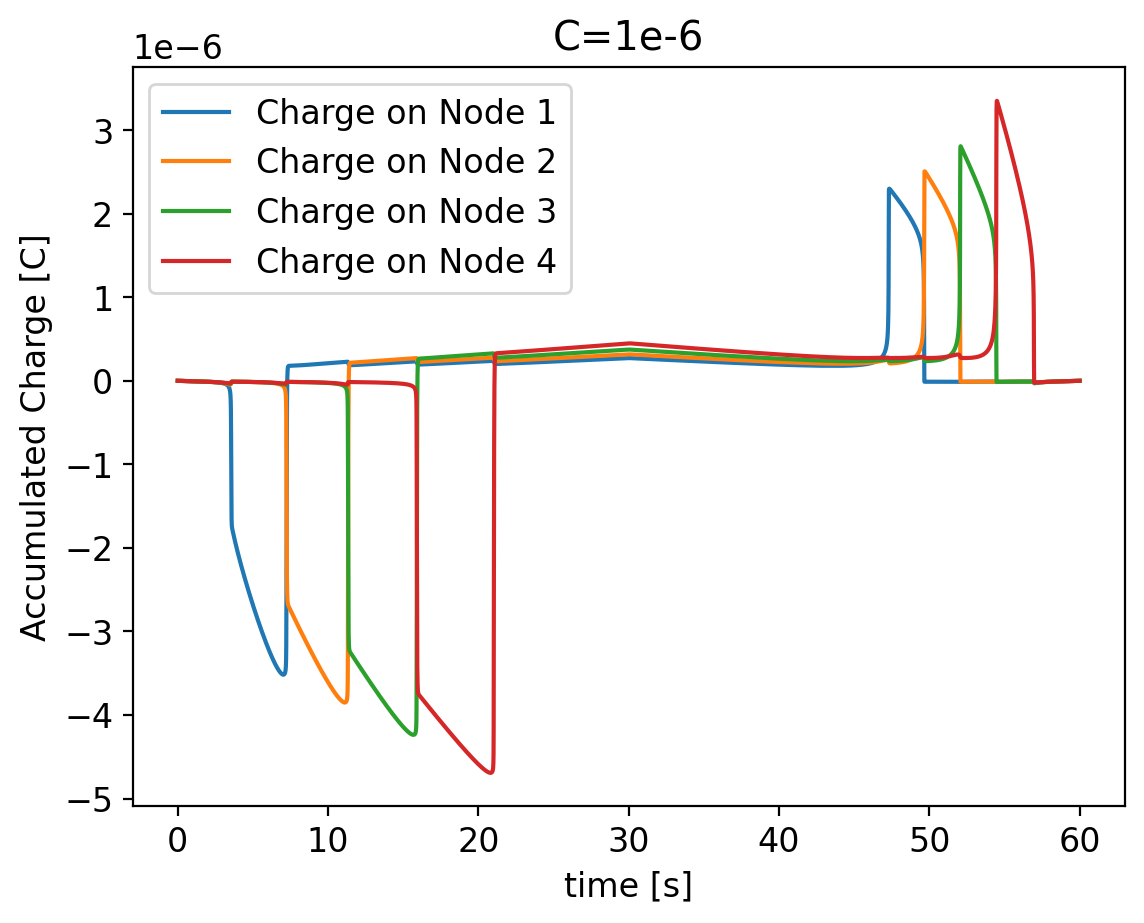

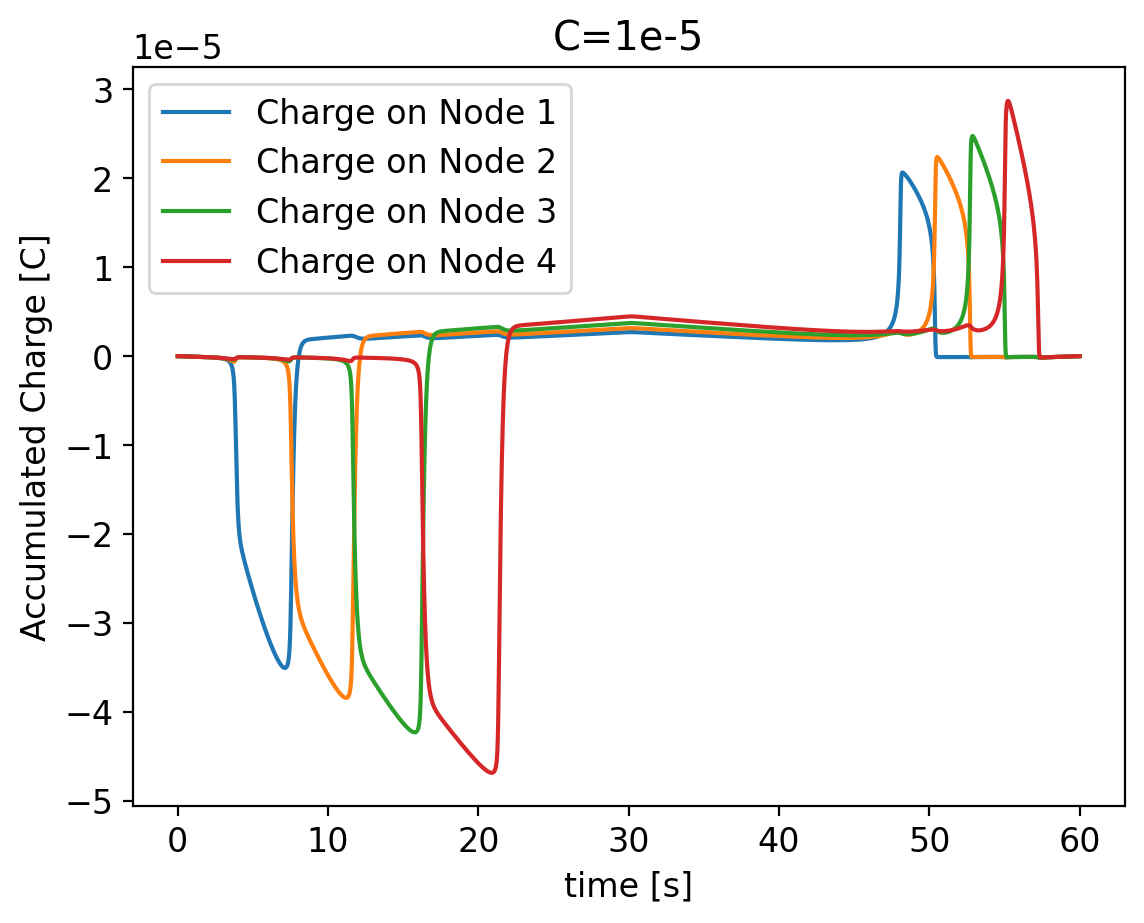

In [14]:
for i in range(1, 5):
    plt.plot(df1['time'], qs1[:,i], label = 'Charge on Node '+str(i))

plt.xlabel('time [s]')
plt.ylabel('Accumulated Charge [C]')
plt.title('C=1e-6')
plt.legend()
plt.show()

for i in range(1, 5):
    plt.plot(df2['time'], qs2[:,i], label = 'Charge on Node '+str(i))

plt.xlabel('time [s]')
plt.ylabel('Accumulated Charge [C]')
plt.title('C=1e-5')
plt.legend()
plt.show()

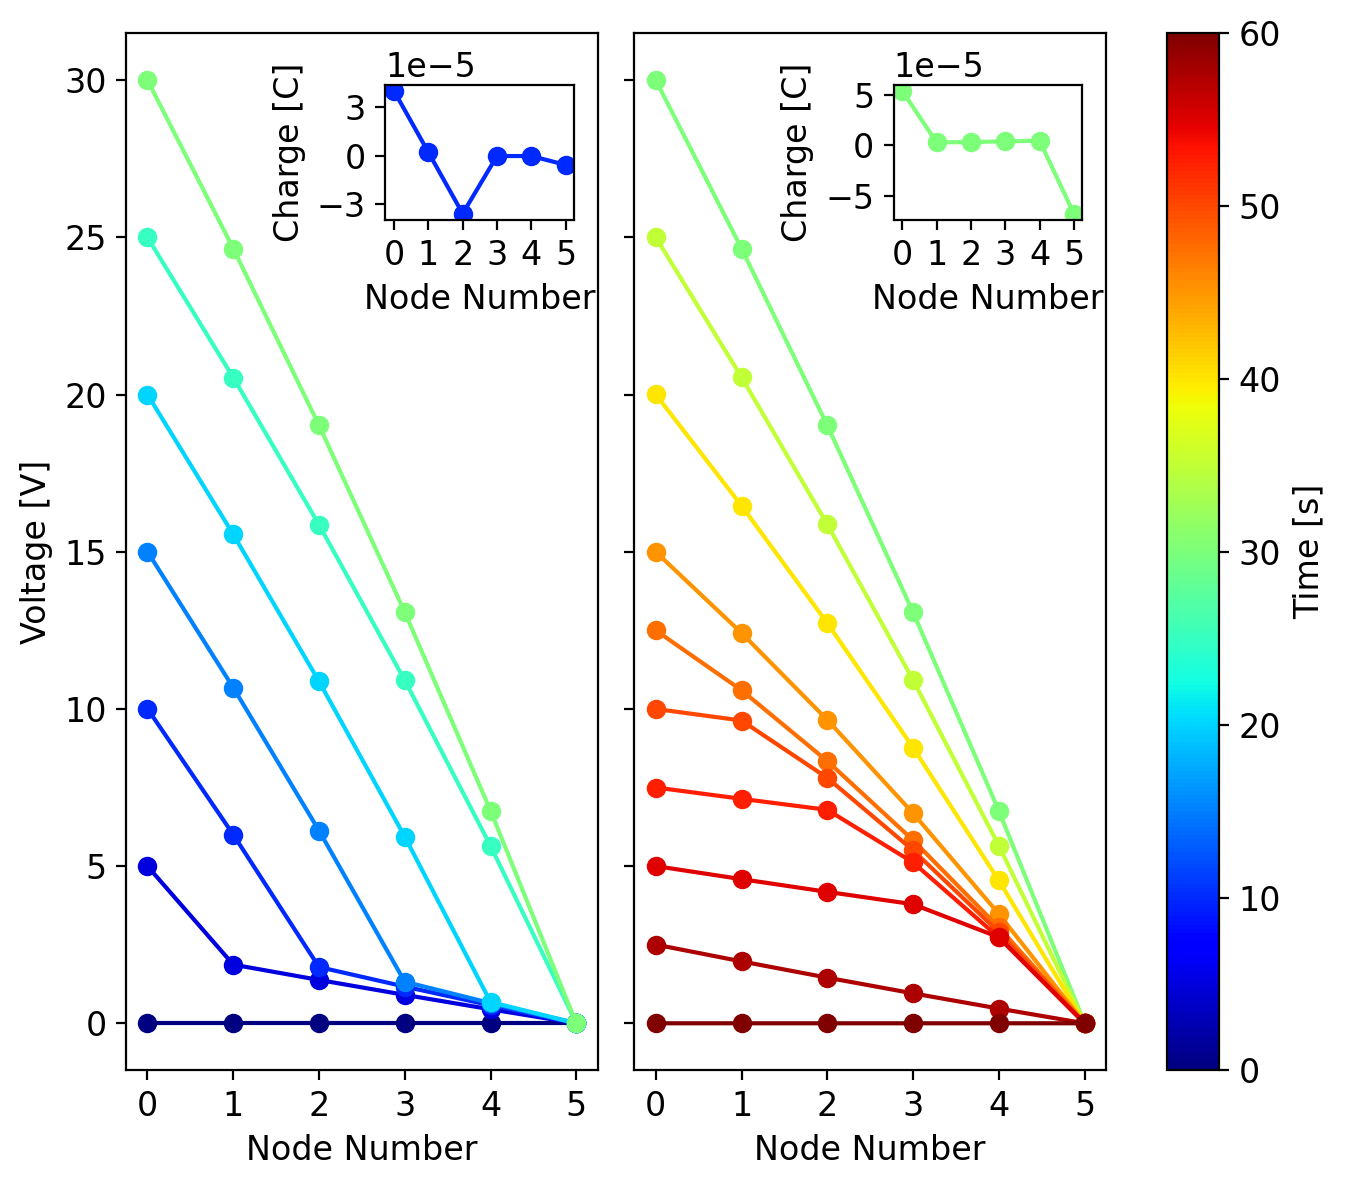

In [15]:
# t_test1 = 9
# t_test2 = 14
#numTs = 10

vd = matplotlib.cm.jet
sm = plt.cm.ScalarMappable(cmap=vd, norm=matplotlib.colors.Normalize(vmin=0, vmax=60))

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7,6))

testTs1 = [0, 5, 10, 15, 20, 25, 30]#np.linspace(0, 60, numTs)
testTs2 = [30, 35, 40, 45, 47.5, 50, 52.5, 55, 57.5, 60]

Vs = Vs2 #np.swapaxes(Vs2, 0, 1)

for testT in testTs1:
    ax[0].plot(np.arange(0, 6, 1), Vs[np.argmin(np.abs(np.array(df2['time'].to_list())-testT))], 'o-', label= 't='+str(testT), c = vd(testT/60))
#fig, ax = plt.subplots(figsize=(7,5))
for testT in testTs2:
    ax[1].plot(np.arange(0, 6, 1), Vs[np.argmin(np.abs(np.array(df2['time'].to_list())-testT))], 'o-', label= 't='+str(testT), c = vd(testT/60))


width = 0.4
height = 0.13
xstart = 0.55
ystart = 0.82

ax_inset = ax[0].inset_axes([xstart, ystart, width, height])

t_test1 = 10

ax_inset.plot(np.arange(0, 6, 1), qs2[np.argmin(np.abs(np.array(df2['time'].to_list())-t_test1))], 'o-', label= 't='+str(t_test1), c = vd(t_test1/60))
ax_inset.set_xlabel('Node Number')
ax_inset.set_ylabel('Charge [C]')
ax_inset.set_xticks(np.arange(0, 6))
ax_inset.set_yticks([-3e-5, 0, 3e-5])

ax_inset2 = ax[1].inset_axes([xstart, ystart, width, height])

t_test2 = 30
t_test1 = t_test2

ax_inset2.plot(np.arange(0, 6, 1), qs2[np.argmin(np.abs(np.array(df2['time'].to_list())-t_test1))], 'o-', label= 't='+str(t_test1), c = vd(t_test1/60))
ax_inset2.set_xlabel('Node Number')
ax_inset2.set_ylabel('Charge [C]')
ax_inset2.set_xticks(np.arange(0, 6))
#ax_inset2.set_yticks([-3e-5, 0, 3e-5])
    
ax[0].set_xlabel('Node Number')
ax[0].set_ylabel('Voltage [V]')
ax[0].set_xticks(np.arange(0, 6))
ax[1].set_xlabel('Node Number')
ax[1].set_xticks(np.arange(0, 6))
#ax[1].set_ylabel('Voltage [V]')
fig.tight_layout()
fig.colorbar(sm, ax = ax, label='Time [s]')
plt.show()
    
# plt.plot(np.arange(1, 7, 1), Vs1[np.argmin(np.abs(np.array(df1['time'].to_list())-t_test1))], 'o-', label= 't='+str(t_test1))
# plt.plot(np.arange(1, 7, 1), Vs1[np.argmin(np.abs(np.array(df1['time'].to_list())-t_test2))], 'o-', label= 't='+str(t_test2), color='green')
# plt.xlabel('Node Number')
# plt.ylabel('Voltage [V]')
# plt.title('C=1e-6')
#plt.legend()

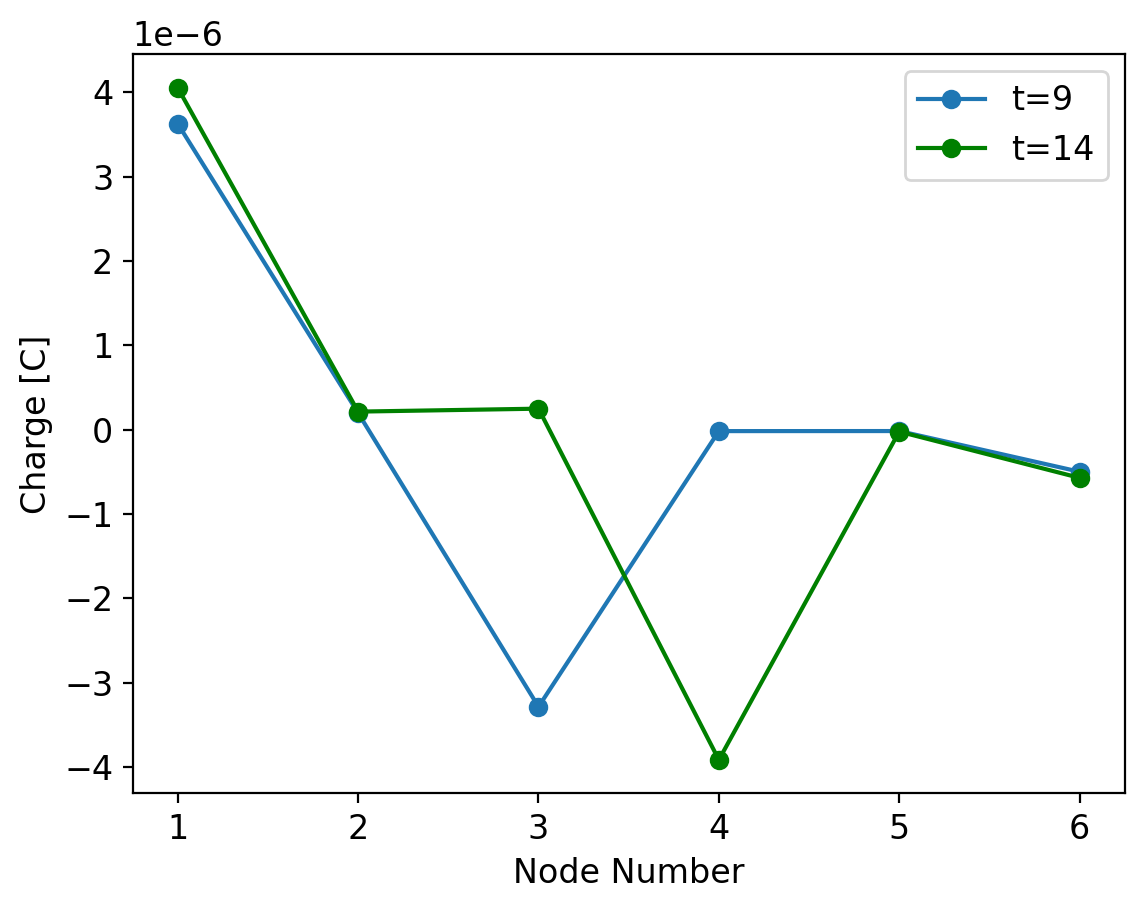

In [16]:
t_test1 = 9
t_test2 = 14

plt.plot(np.arange(1, 7, 1), qs1[np.argmin(np.abs(np.array(df1['time'].to_list())-t_test1))], 'o-', label= 't='+str(t_test1))
plt.plot(np.arange(1, 7, 1), qs1[np.argmin(np.abs(np.array(df1['time'].to_list())-t_test2))], 'o-', label= 't='+str(t_test2), color='green')
plt.xlabel('Node Number')
plt.ylabel('Charge [C]')
plt.legend()
plt.show()

# Time Scale

C:\Users\nadia\AppData\Local\Temp\ipykernel_19468\2469171849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVoltages.loc[:, 'Vn'+str(numNodes+1)] = list(np.zeros(len(df['time']))) #To add grounded node


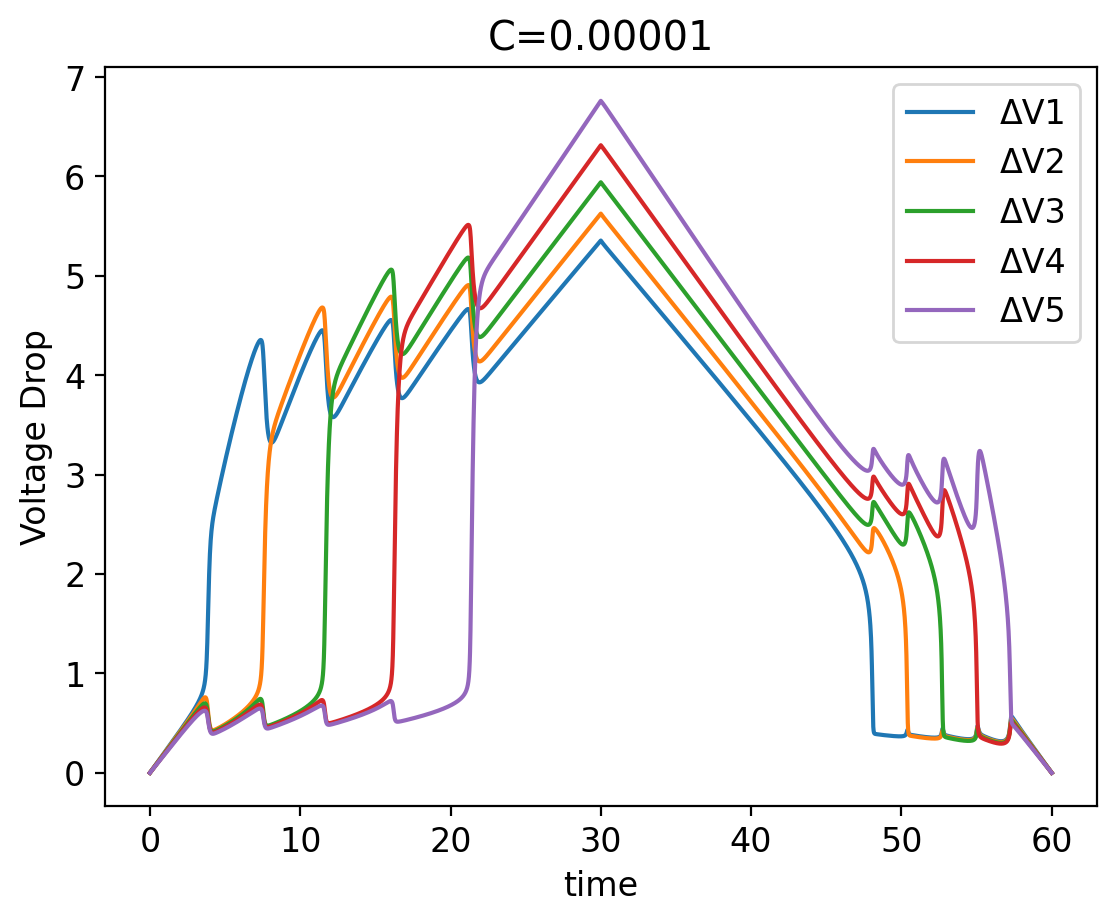

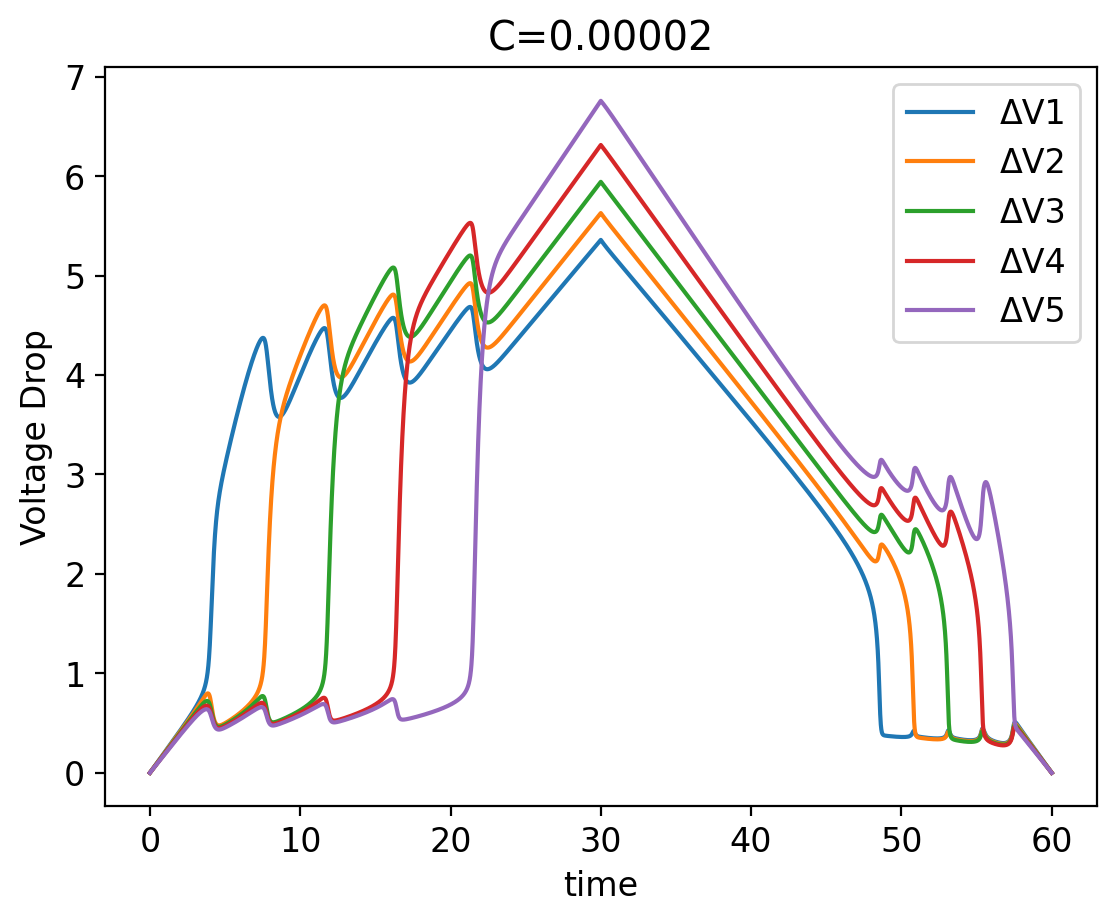

In [17]:
Vs2 = getVs(df2)

for i in range(len(Vs2)-1):
    plt.plot(df2['time'], Vs2[i]-Vs2[i+1], label = 'ΔV'+str(i+1))
plt.xlabel('time')
plt.ylabel('Voltage Drop')
plt.legend()
plt.title('C=0.00001')
plt.show()

for i in range(len(Vs3)-1):
    plt.plot(df3['time'], Vs3[i]-Vs3[i+1], label = 'ΔV'+str(i+1))
plt.xlabel('time')
plt.ylabel('Voltage Drop')
plt.title('C=0.00002')
plt.legend()
plt.show()

Text(0, 0.5, '$V_0$ [V]')

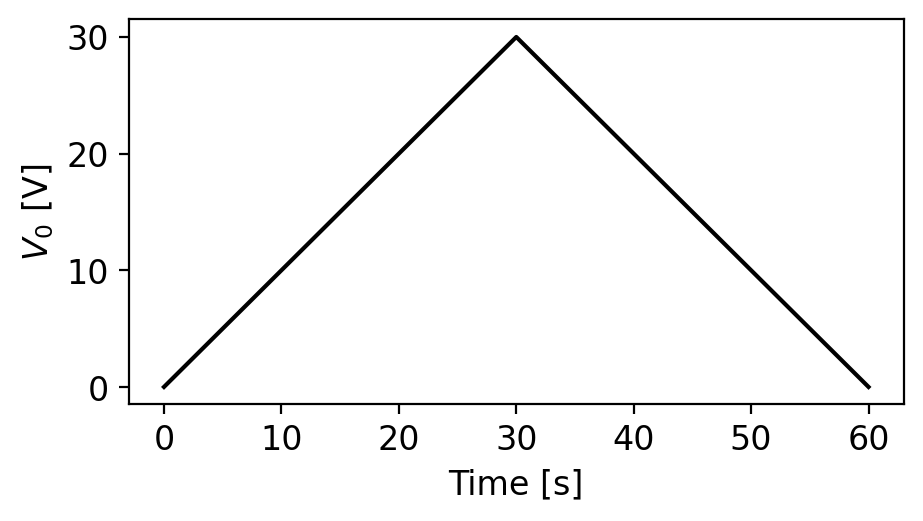

In [18]:
fig, axes = plt.subplots(figsize=(5,2.5))
axes.plot(df2['time'], df2['Vn1'], c = 'black')
#axes.scatter([0, 50, 60], [0, 10, 0], c=[0, 50/60, 1], cmap=matplotlib.cm.jet)
axes.set_xlabel('Time [s]')
axes.set_ylabel('$V_0$ [V]')

# fig, axes = plt.subplots(figsize=(5,2.5))
# axes.scatter(df2['time'], df2['Vn1'], c = list(df2['time']/60), cmap=matplotlib.cm.jet)
# #axes.plot(50, 10, 'o', color='red')
# axes.set_xlabel('Time [s]')
# axes.set_ylabel('$V_0$ [V]')

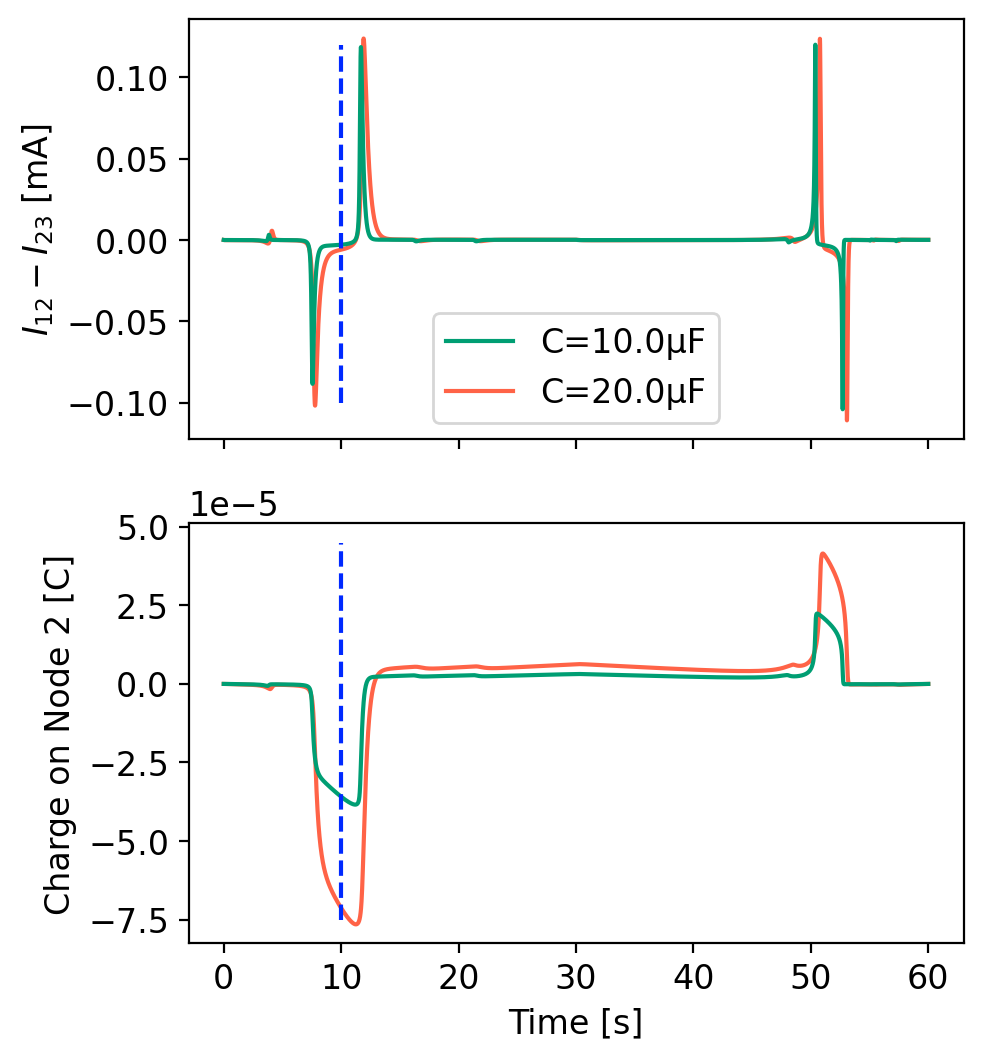

In [19]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(5, 6))

color1 = "#009E73"
color2 = 'tomato'
# "#009E73" This one is green
# "#E69F00" This one is yellow
# 'tomato'

axes[0].plot(df2['time'], 1000*(df2['IR2']-df2['IR3']), label = 'C='+str(capVal2*1e6)+'μF', color=color1) #factor of 1000 to use mA
axes[0].plot(df3['time'], 1000*(df3['IR2']-df3['IR3']), label = 'C='+str(capVal3*1e6)+'μF', color=color2, zorder=1) #factor of 1000 to use mA


charge2 = integrate.cumulative_trapezoid(df2['IR2']-df2['IR3'], df2['time'], initial=0)
axes[1].plot(df2['time'], charge2, color=color1)
charge3 = integrate.cumulative_trapezoid(df3['IR2']-df3['IR3'], df3['time'], initial=0)
axes[1].plot(df3['time'], charge3, color=color2, zorder=1)

axes[1].vlines(x=10, ymin=-7.5e-5, ymax=4.5e-5, color = vd(10/60), linestyle='--')
axes[0].vlines(x=10, ymin=-0.1, ymax=0.12, color = vd(10/60), linestyle='--')

axes[1].set_xlabel('Time [s]')
axes[0].set_ylabel('$I_{12} - I_{23}$ [mA]')
axes[1].set_ylabel('Charge on Node 2 [C]')
axes[0].legend()
plt.show()

In [20]:
# charge2 = integrate.cumulative_trapezoid(df2['IR2']-df2['IR3'], df2['time'], initial=0)
# plt.plot(df2['time'], charge2, label = 'C='+str(capVal2))

# charge3 = integrate.cumulative_trapezoid(df3['IR2']-df3['IR3'], df3['time'], initial=0)
# plt.plot(df3['time'], charge3, label = 'C='+str(capVal3))

# plt.xlabel('Time [s]')
# plt.ylabel('Charge on Node 3 [C]')
# plt.legend()
# plt.show()

In [21]:
df51 = df2
df52 = import_data('spice_raw_data/cap_fig_c0.00001_2VperSec.txt')
df53 = import_data('spice_raw_data/cap_fig_c0.00001_3VperSec.txt')

df61 = df1
df62 = import_data('spice_raw_data/cap_fig_c0.000001_2VperSec.txt')
df63 = import_data('spice_raw_data/cap_fig_c0.000001_3VperSec.txt')

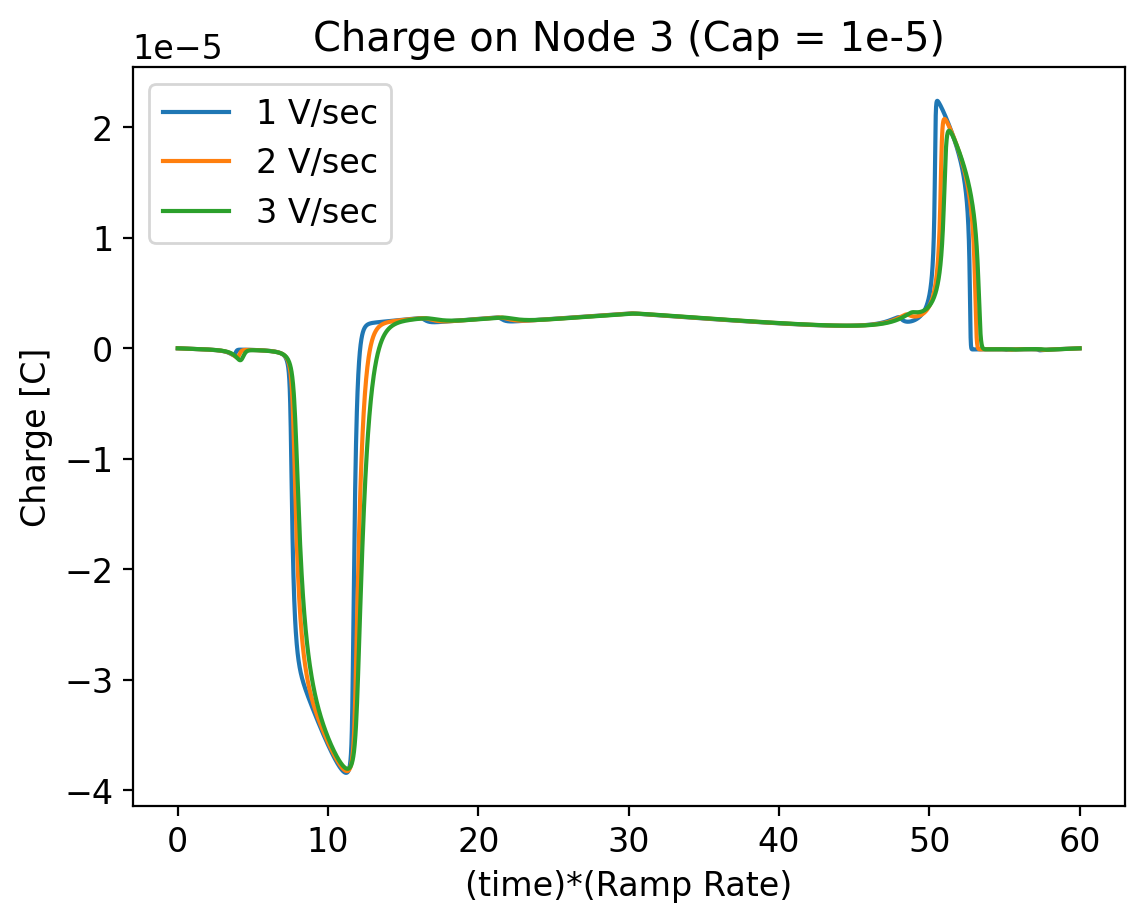

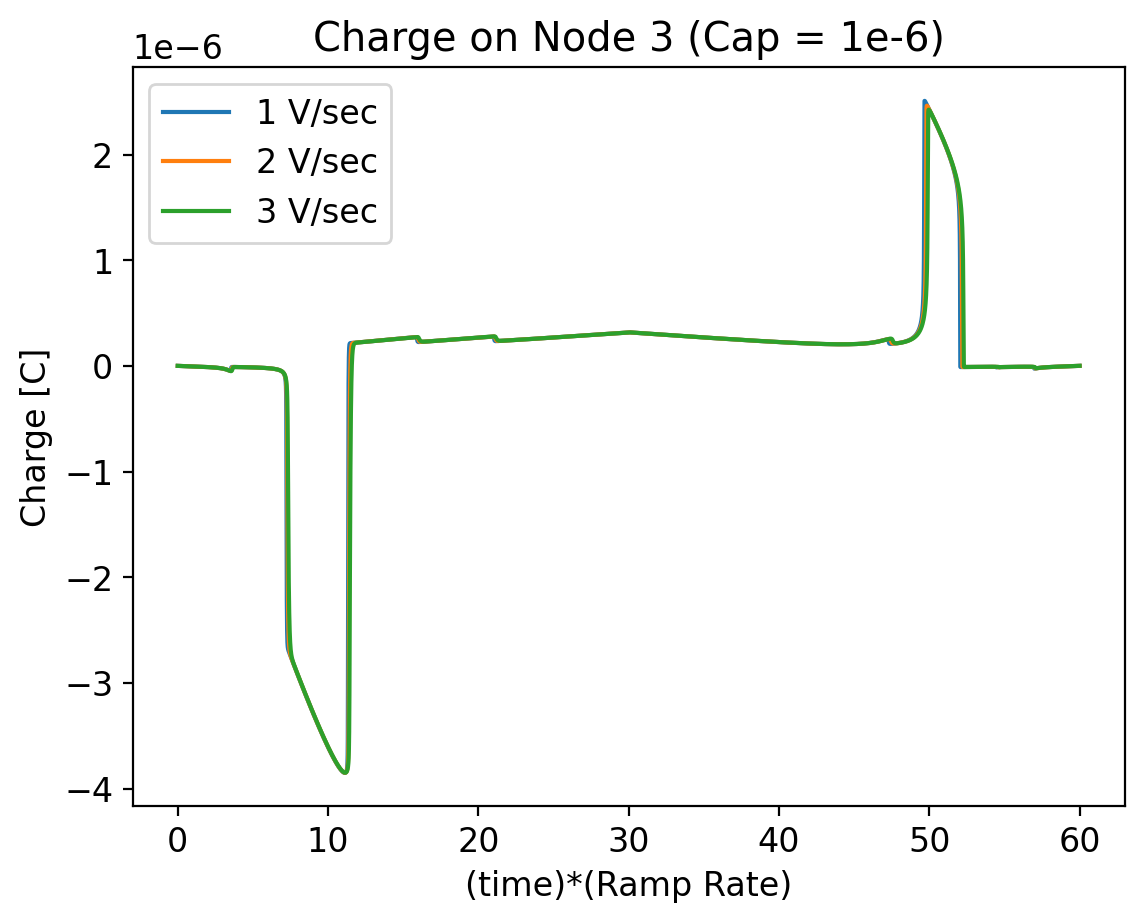

In [22]:
charge51 = integrate.cumulative_trapezoid(df51['IR2']-df51['IR3'], df51['time'], initial=0)
plt.plot(df51['time'], charge51, label = '1 V/sec')

charge52 = integrate.cumulative_trapezoid(df52['IR2']-df52['IR3'], df52['time'], initial=0)
plt.plot(2*df52['time'], charge52, label = '2 V/sec')

charge53 = integrate.cumulative_trapezoid(df53['IR2']-df53['IR3'], df53['time'], initial=0)
plt.plot(3*df53['time'], charge53, label = '3 V/sec')

plt.xlabel('(time)*(Ramp Rate)')
plt.ylabel('Charge [C]')
plt.title('Charge on Node 3 (Cap = 1e-5)')
plt.legend()
plt.show()

charge61 = integrate.cumulative_trapezoid(df61['IR2']-df61['IR3'], df61['time'], initial=0)
plt.plot(df61['time'], charge61, label = '1 V/sec')

charge62 = integrate.cumulative_trapezoid(df62['IR2']-df62['IR3'], df62['time'], initial=0)
plt.plot(2*df62['time'], charge62, label = '2 V/sec')

charge63 = integrate.cumulative_trapezoid(df63['IR2']-df63['IR3'], df63['time'], initial=0)
plt.plot(3*df63['time'], charge63, label = '3 V/sec')

plt.xlabel('(time)*(Ramp Rate)')
plt.ylabel('Charge [C]')
plt.title('Charge on Node 3 (Cap = 1e-6)')
plt.legend()
plt.show()